#Cost analysis, predictions and forecasting using time series for the banks BOFA, JP Morgan, Goldman Sachs.

importing the required libraries and loading the yfinance dataframe.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import warnings
import yfinance as yf
import seaborn as sns; sns.set()
yf.pdr_override()
%matplotlib inline
warnings.filterwarnings('ignore')

lets load the bank data from the yfinance dataframe into the stocks dataframe with the intervel of one day.

In [ ]:
stocks = ['BAC', 'JPM', 'GS']
start = datetime.datetime(2015,1,1)
end = datetime.datetime(2023,3,17)
stocks_price = yf.download(stocks,start=start,end = end,interval='1d')
stocks_price.head()

[*********************100%%**********************]  3 of 3 completed


Adj Close                             Close              \
                  BAC          GS        JPM        BAC          GS   
Date                                                                  
2015-01-02  15.021375  164.772476  49.209702  17.900000  194.410004   
2015-01-05  14.584991  159.627777  47.681992  17.379999  188.339996   
2015-01-06  14.148623  156.398621  46.445641  16.860001  184.529999   
2015-01-07  14.215755  158.729446  46.516514  16.940001  187.279999   
2015-01-08  14.509472  161.263550  47.555981  17.290001  190.270004   

                            High                               Low  \
                  JPM        BAC          GS        JPM        BAC   
Date                                                                 
2015-01-02  62.490002  18.030001  195.729996  62.959999  17.680000   
2015-01-05  60.549999  17.809999  194.039993  62.279999  17.290001   
2015-01-06  58.980000  17.440001  188.660004  60.750000  16.780001   
2015-01-07  59.070000  17.180000  187.990005  59.889999  16.870001   
2015-01-08  60.389999  17.340000  190.820007  60.900002  17.100000   

                                        Open                         \
                    GS        JPM        BAC          GS        JPM   
Date                                                                  
2015-01-02  192.699997  62.070000  17.990000  195.300003  62.180000   
2015-01-05  187.479996  60.230000  17.790001  193.059998  62.060001   
2015-01-06  183.929993  58.349998  17.420000  188.300003  60.639999   
2015-01-07  185.770004  58.669998  17.139999  186.850006  59.889999   
2015-01-08  189.250000  59.970001  17.160000  189.350006  59.970001   

               Volume                     
                  BAC       GS       JPM  
Date                                      
2015-01-02   48951100  1877700  12600000  
2015-01-05  105605500  3413200  20100600  
2015-01-06  144912400  3429200  29074100  
2015-01-07  104603800  1896800  23843200  
2015-01-08   73388500  1962500  16971100

Preliminary analysis

lets only consider the stock price at the closing time of each day.



In [ ]:
stocks_cp = stocks_price['Close']
stocks_cp.head()

,BAC,GS,JPM
Date,,,
2015-01-02,17.900000,194.410004,62.490002
2015-01-05,17.379999,188.339996,60.549999
2015-01-06,16.860001,184.529999,58.980000
2015-01-07,16.940001,187.279999,59.070000
2015-01-08,17.290001,190.270004,60.389999


In [ ]:
stocks_cp =stocks_cp.rename(columns={'BAC':'bank_of_america','GS':'goldman_sachs','JPM':'JP_morgan'})
stocks_cp.head()


,bank_of_america,goldman_sachs,JP_morgan
Date,,,
2015-01-02,17.900000,194.410004,62.490002
2015-01-05,17.379999,188.339996,60.549999
2015-01-06,16.860001,184.529999,58.980000
2015-01-07,16.940001,187.279999,59.070000
2015-01-08,17.290001,190.270004,60.389999


In [ ]:
stocks1 = ['BAC', 'JPM', 'GS']
start1 = datetime.datetime(2023,3,16)
end1 = datetime.datetime(2023,3,31)
stocks_price1 = yf.download(stocks,start=start1,end = end1,interval='1d')
stocks_price1.head()

[*********************100%%**********************]  3 of 3 completed


Adj Close                              Close              \
                  BAC          GS         JPM        BAC          GS   
Date                                                                   
2023-03-16  28.503132  310.123016  128.846985  28.969999  315.089996   
2023-03-17  27.371666  298.755096  123.978882  27.820000  303.540009   
2023-03-20  27.302794  304.650665  125.289528  27.750000  309.529999   
2023-03-21  28.129255  312.278503  128.649902  28.590000  317.279999   
2023-03-22  27.194565  308.725433  125.328941  27.639999  313.670013   

                             High                                Low  \
                   JPM        BAC          GS         JPM        BAC   
Date                                                                   
2023-03-16  130.750000  29.469999  318.320007  131.949997  28.110001   
2023-03-17  125.809998  28.660000  310.399994  128.479996  27.620001   
2023-03-20  127.139999  28.430000  312.200012  129.470001  27.650000   
2023-03-21  130.550003  28.980000  320.320007  131.729996  28.510000   
2023-03-22  127.180000  28.740000  322.220001  130.660004  27.639999   

                                         Open                          \
                    GS         JPM        BAC          GS         JPM   
Date                                                                    
2023-03-16  304.920013  126.019997  28.379999  309.000000  128.009995   
2023-03-17  301.869995  125.449997  28.660000  310.089996  128.380005   
2023-03-20  306.260010  126.010002  28.240000  306.779999  126.989998   
2023-03-21  315.350006  130.190002  28.629999  317.619995  130.589996   
2023-03-22  313.489990  127.080002  28.709999  317.279999  130.559998   

               Volume                     
                  BAC       GS       JPM  
Date                                      
2023-03-16  108348800  4399100  24558500  
2023-03-17  130665500  6369800  38396000  
2023-03-20   81441200  3963700  22875500  
2023-03-21   84854800  3242400  17807800  
2023-03-22   76925900  2505900  17250200

In [ ]:
stocks_cp1 = stocks_price1['Close']
stocks_cp1.head()

,BAC,GS,JPM
Date,,,
2023-03-16,28.969999,315.089996,130.750000
2023-03-17,27.820000,303.540009,125.809998
2023-03-20,27.750000,309.529999,127.139999
2023-03-21,28.590000,317.279999,130.550003
2023-03-22,27.639999,313.670013,127.180000


In [ ]:
stocks_cp1.info()
stocks_cp1

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11 entries, 2023-03-16 to 2023-03-30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BAC     11 non-null     float64
 1   GS      11 non-null     float64
 2   JPM     11 non-null     float64
dtypes: float64(3)
memory usage: 352.0 bytes


,BAC,GS,JPM
Date,,,
2023-03-16,28.969999,315.089996,130.750000
2023-03-17,27.820000,303.540009,125.809998
2023-03-20,27.750000,309.529999,127.139999
2023-03-21,28.590000,317.279999,130.550003
2023-03-22,27.639999,313.670013,127.180000
2023-03-23,26.969999,314.850006,126.839996
2023-03-24,27.139999,312.570007,124.910004
2023-03-27,28.490000,318.529999,128.490005
2023-03-28,28.120001,318.440002,128.880005


In [ ]:
stocks_cp1 =stocks_cp1.rename(columns={'BAC':'bank_of_america','GS':'goldman_sachs','JPM':'JP_morgan'})
stocks_cp1.head()

,bank_of_america,goldman_sachs,JP_morgan
Date,,,
2023-03-16,28.969999,315.089996,130.750000
2023-03-17,27.820000,303.540009,125.809998
2023-03-20,27.750000,309.529999,127.139999
2023-03-21,28.590000,317.279999,130.550003
2023-03-22,27.639999,313.670013,127.180000


In [ ]:
stocks_cp=stocks_cp.dropna()   # lets drop the missing values
stocks_cp .describe()


,bank_of_america,goldman_sachs,JP_morgan
count,2065.000000,2065.000000,2065.000000
mean,27.646174,245.029186,105.373215
std,8.809674,70.858452,30.568961
min,11.160000,134.970001,53.070000
25%,22.180000,195.639999,84.730003
50%,28.240000,224.539993,106.620003
75%,33.150002,294.209991,126.029999
max,49.380001,423.850006,171.779999


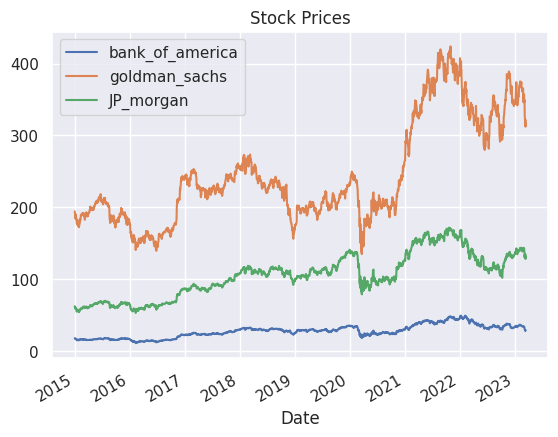

In [ ]:
stocks_cp.loc[:,['bank_of_america','goldman_sachs','JP_morgan']].plot()
plt.title('Stock Prices')
plt.xlabel('Date')
plt.show()

from the above graph we can observe a negative treand in all the three banks, but if we take into account the whole picture they are still doing better than what they were doing 2 years ago.

lets identify patterns and underlying structures in a time series, which can help with forecasting and understanding the behavior of the series using the seasonal_decompose model